In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import seaborn as sns
import umap.umap_ as umap  # 正确导入UMAP

# PCA

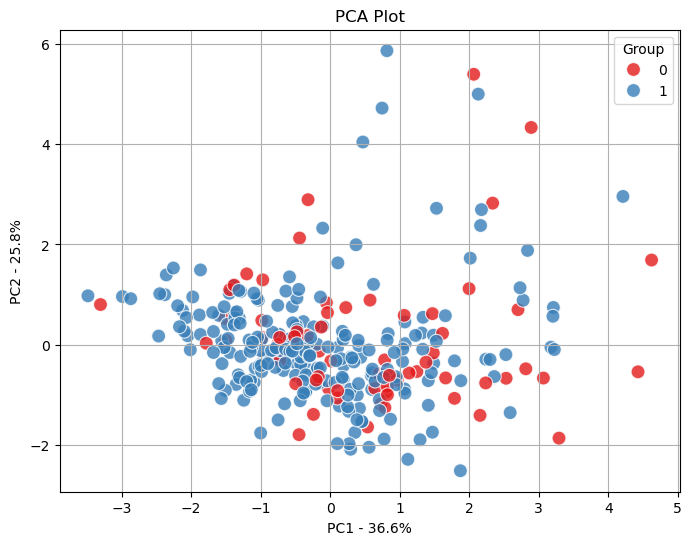

In [298]:
pca = PCA(n_components=2, random_state=1) # create a PCA object
pca_data = pca.fit_transform(x_train) # get PCA coordinates 
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Make a fancy looking plot using PC1 and PC2 with color for different Groups
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Assuming 'Group' is a column in the original dataset x_train that indicates the group for each sample
pca_df['Group'] = y_train

# Plotting with color
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette='Set1', s=100, alpha=0.8)
plt.title('PCA Plot')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.legend(title='Group')
plt.grid(True)
plt.show()


In [299]:
def pca_plot(x_train, y_train, n_components=2, random_state=42, per_var=None, title=''):
    """
    使用 PCA 对数据进行降维并绘制散点图。
    
    参数:
    - x_train: 特征数据
    - y_train: 目标变量（类别）
    - n_components: PCA 降维后的组件数量，默认为 2
    - random_state: 随机种子
    - per_var: 各主成分解释的方差比例（用于图中标记）
    """
    # 创建 PCA 对象并进行降维
    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data = pca.fit_transform(x_train)  # 获取 PCA 坐标
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
    
    # 创建 PCA 数据框
    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Group'] = y_train  # 添加目标变量列

    # 绘制 PCA 图
    plt.figure(figsize=(8, 6))
    

    sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette='Set1', s=100, alpha=0.8)
    plt.xlabel(f'PC1 - {per_var[0]}%') 
    plt.ylabel(f'PC2 - {per_var[1]}%')
    
    plt.title(f"{title} PCA Plot")
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()

# t-SNE

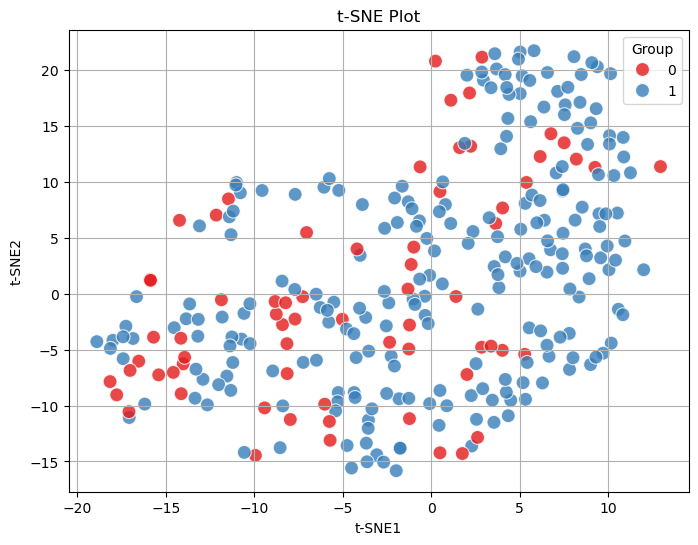

In [300]:
# 使用t-SNE直接降维到2个维度
tsne = TSNE(n_components=2, random_state=42, n_jobs=2)
tsne_result = tsne.fit_transform(x_train)

# 将结果转换为DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['Group'] = y_train

# 绘制t-SNE结果
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Group', data=tsne_df, palette='Set1', s=100, alpha=0.8)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Group')
plt.grid(True)
plt.show()


In [301]:
def tsne_plot(x_train, y_train, n_components=2, random_state=42, n_jobs=2, title=''):
    """
    使用 t-SNE 对数据进行降维并绘制图形。

    参数:
    - x_train: 特征数据集 (DataFrame)
    - y_train: 目标变量 (DataFrame)
    - n_components: t-SNE 降维后的维度数量，默认为 2
    - random_state: 随机种子 (int, 默认值: 42)
    - n_jobs: 并行处理的核心数 (int, 默认值: 2)
    - model_name: 模型名称，用于图表标题 (str)

    返回:
    - None
    """
    # 使用 t-SNE 降维
    tsne = TSNE(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
    tsne_result = tsne.fit_transform(x_train)

    # 将结果转换为 DataFrame
    tsne_df = pd.DataFrame(tsne_result, columns=[f't-SNE{i+1}' for i in range(n_components)])
    tsne_df['Group'] = y_train

    # 绘制 t-SNE 结果
    plt.figure(figsize=(8, 6))

    sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Group', data=tsne_df, palette='Set1', s=100, alpha=0.8)
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.title(f'{title} t-SNE Plot')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()

# umap

In [7]:
# 使用UMAP降维到2个维度
umap_reducer = umap.UMAP(n_components=2, n_jobs = 2, n_neighbors = 15)
umap_result = umap_reducer.fit_transform(x_train)

# 将结果转换为DataFrame
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['Group'] = y_test

In [8]:
umap_df.to_excel('shap-umap点坐标train.xlsx', index=False)

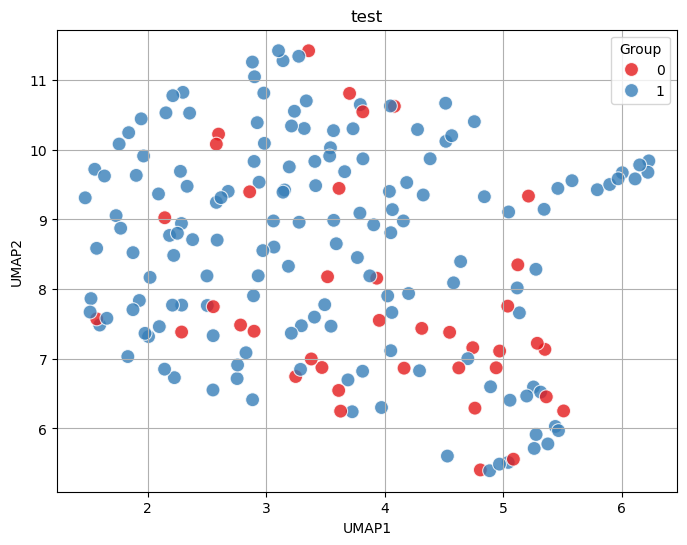

In [9]:
# 绘制UMAP结果
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Group', data=umap_df, palette='Set1', s=100, alpha=0.8)
plt.title('train')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Group')
plt.grid(True)
plt.savefig('train-umap.png', dpi=300, bbox_inches='tight')
plt.show()

In [303]:
def umap_plot(x, y, n_components=2, n_jobs=2, n_neighbors=15, title = ''):
    """
    使用 UMAP 对数据进行降维并绘制图形。

    参数:
    x_train: 特征数据集 (DataFrame)
    y_train: 目标变量 (DataFrame)
    n_components: 降维后的维度 (int, 默认值: 2)
    n_jobs: 并行处理的核心数 (int, 默认值: 2)
    n_neighbors: UMAP 的邻居数量 (int, 默认值: 15)

    返回:
    None
    """
    # 使用 UMAP 降维到 2 个维度
    umap_reducer = umap.UMAP(n_components=n_components, n_jobs=n_jobs, n_neighbors=n_neighbors)
    umap_result = umap_reducer.fit_transform(x_train)

    # 将结果转换为 DataFrame
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['Group'] = y_train

    # 绘制 UMAP 结果
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Group', data=umap_df, palette='Set1', s=100, alpha=0.8)
    plt.title(f'{title} UMAP Plot')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()

# 数据高维降维（十六）

In [2]:
# 载入数据集
data = "./20240820 对数加一训练集和测试集.xlsx"

# 载入训练集
dataset = pd.DataFrame(pd.read_excel(data, sheet_name="训练集"))
x_train = dataset[dataset.columns[1:]]
y_train = dataset[['Group']].values.ravel()  # 使用ravel()将y_train转换为一维数组

# 载入测试集
dataset_test = pd.DataFrame(pd.read_excel(data, sheet_name="测试集"))
x_test = dataset_test[dataset_test.columns[1:]]
y_test = dataset_test[['Group']].values.ravel()  # 使用ravel()将y_test转换为一维数组

In [3]:
feature_list = ['Gender', 'PCT', 'Cough', 'Fever', 'IBIL', 'PLT', 'AST', 'CRP', 'γ-GT', 'ALP']
feature_list

['Gender', 'PCT', 'Cough', 'Fever', 'IBIL', 'PLT', 'AST', 'CRP', 'γ-GT', 'ALP']

In [4]:
#feature_list = feature_list[0:5]
x_train = x_train[feature_list]
x_test = x_test[feature_list]
x_train.shape

(300, 10)

In [5]:
dataset = 'permutation10特征-test'
title = 'test'

In [10]:
# 使用UMAP降维到2个维度
umap_reducer = umap.UMAP(n_components=2, n_jobs = 2, n_neighbors = 15)
umap_result = umap_reducer.fit_transform(x_test)

# 将结果转换为DataFrame
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['Group'] = y_test

In [24]:
#umap_df.to_excel(f'/Users/louhao/Desktop/16支队数据图片整理1006-1902/Umap降维、机器学习拟合后的可视化/permutation10特征/{dataset}-umap.xlsx', index=False)

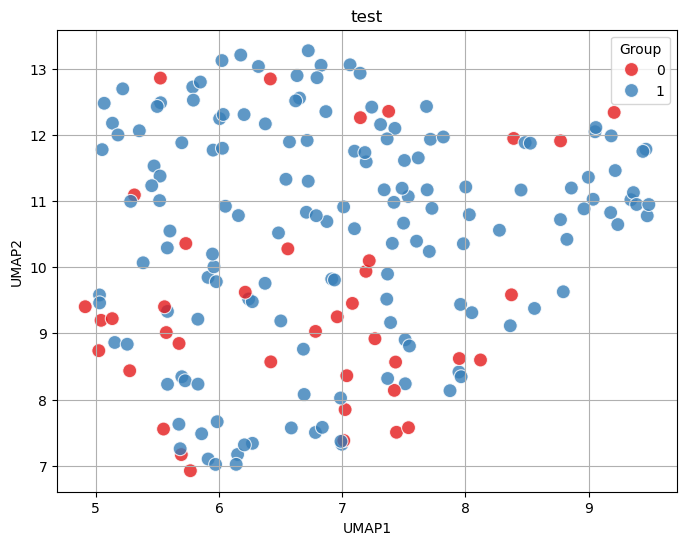

In [25]:
# 绘制UMAP结果
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Group', data=umap_df, palette='Set1', s=100, alpha=0.8)
plt.title(f'{title}') #修改
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Group')
plt.grid(True)
#plt.savefig(f'/Users/louhao/Desktop/16支队数据图片整理1006-1902/Umap降维、机器学习拟合后的可视化/permutation10特征/{dataset}-umap.png', dpi=300, bbox_inches='tight')
plt.show()

# 原始数据高维降维（十七）

In [117]:
random_num = 1
data = "归一化后的数据/归一化后的数据（十七支队）.xlsx"
data_test = "归一化后的数据/归一化后的数据（十七支队）.xlsx"

# 载入数据集
excelFile = data
dataset = pd.DataFrame(pd.read_excel(excelFile,sheet_name="训练集"))  #development
x_train = dataset[dataset.columns[1:]]
y_train = dataset[['Group']].values.ravel()
excelFile_test = data_test
#dataset_test_1 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="留出集")) #external_test_2
#x_test_1 = dataset_test_1[dataset_test_1.columns[1:]]
#y_test_1 = dataset_test_1[['Group']].values.ravel()
#dataset_test_2 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="西溪验证集")) #external_val
#x_test_2 = dataset_test_2[dataset_test_2.columns[1:]]
#y_test_2 = dataset_test_2[['Group']].values.ravel()
dataset_test_3 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="浙一验证集")) #external_test_1
x_test_3 = dataset_test_3[dataset_test_3.columns[1:]]
y_test_3 = dataset_test_3[['Group']].values.ravel()

#dataset_test_5 = pd.DataFrame(pd.read_excel(excelFile_test, sheet_name="全体数据集without训练集")) #total_wo_development
#x_test_5 = dataset_test_5[dataset_test_5.columns[1:]]
#y_test_5 = dataset_test_5[['Group']].values.ravel()

In [118]:
model_name = 'Metric Learning'
#feature_df = pd.read_excel(f'/Users/louhao/Desktop/Figure5定稿图/图d（Metric Learning尽量凸显）/{model_name}/平均绝对值图数据.xlsx')
#feature_list = feature_df.loc[:, 'Feature']
feature_list = ['CRP', 'D-Dimer', 'LDH', 'Rash', 'SLNE'] #metric learning
feature_list = feature_list[0:5]
x_test_3 = x_test_3[feature_list]
x_test_3.shape

(52, 5)

## pca

In [195]:
def mypca(x, y, model_name, df_path, plot_path):
    pca = PCA(n_components=2, random_state=1) # create a PCA object
    pca_data = pca.fit_transform(x) # get PCA coordinates 
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Make a fancy looking plot using PC1 and PC2 with color for different Groups
    pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Assuming 'Group' is a column in the original dataset x_train that indicates the group for each sample
    pca_df['Group'] = y
    pca_df.to_excel(df_path, index=False)

# Plotting with color
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette='Set1', s=100, alpha=0.8)
    plt.title(f'{model_name}')
#plt.xlabel('PC1 - {0}%'.format(per_var[0]))
#plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Group')
    plt.grid(True)
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    #plt.show()

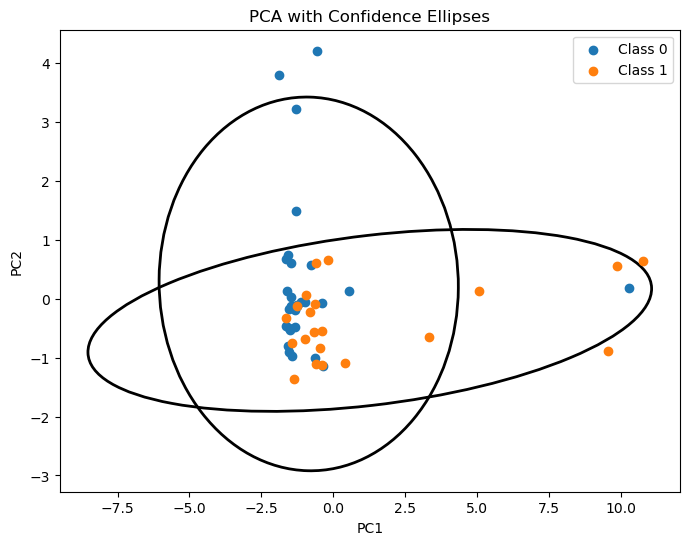

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 读取Excel文件
file_path = "/Users/louhao/Desktop/马尼菲预测模型/浙一5特征降维/浙一5特征pca/DecisionTreeClassifier-pca.xlsx"  # 替换为你的Excel文件路径
data_df = pd.read_excel(file_path)

# 提取PCA维度数据和标签
data = data_df.iloc[:, :2].values  # 第一列和第二列作为PCA数据
labels = data_df.iloc[:, 2].values  # 第三列作为类别标签

def plot_pca_with_confidence_ellipse(data, labels, confidence=0.95):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(8, 6))

    for label in unique_labels:
        # 获取属于当前类别的数据点
        points = data[labels == label]
        
        # 计算均值和协方差矩阵
        mean = np.mean(points, axis=0)
        cov = np.cov(points, rowvar=False)
        
        # 计算置信椭圆的参数
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
        
        # 置信椭圆的轴长
        width, height = 2 * np.sqrt(eigenvalues * 5.991)  # 5.991对应于95%置信水平的卡方分布
        
        # 椭圆角度
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
        
        # 绘制置信椭圆
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='k', lw=2, facecolor='none')
        plt.gca().add_patch(ellipse)
        
        # 绘制数据点
        plt.scatter(points[:, 0], points[:, 1], label=f"Class {label}")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.title("PCA with Confidence Ellipses")
    plt.show()

# 调用函数绘图
plot_pca_with_confidence_ellipse(data=data, labels=labels)


## umap

In [196]:
def myumap(x, y, model_name, df_path, plot_path):
    # 使用UMAP降维到2个维度
    umap_reducer = umap.UMAP(random_state=1)
    umap_result = umap_reducer.fit_transform(x)

# 将结果转换为DataFrame
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['Group'] = y
    umap_df.to_excel(df_path, index=False)

# 绘制UMAP结果
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Group', data=umap_df, palette='Set1', s=100, alpha=0.8)
    plt.title(f'{model_name}') #修改
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Group')
    plt.grid(True)
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    #plt.show()


## 调用

/Users/louhao/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/louhao/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/louhao/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/louhao/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for paral

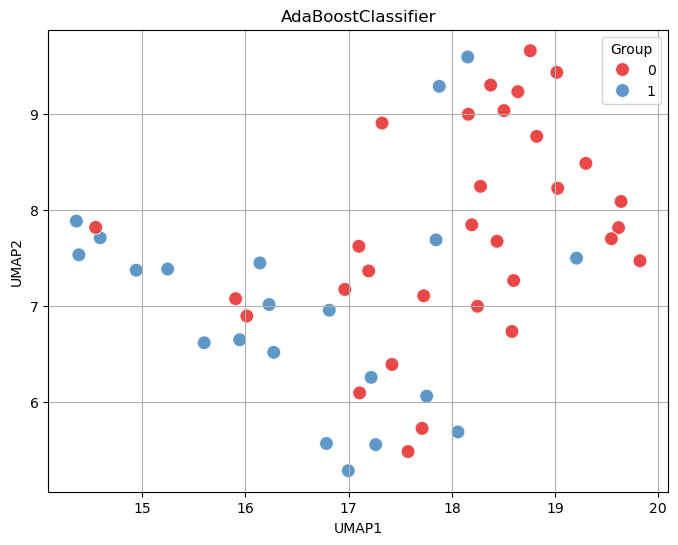

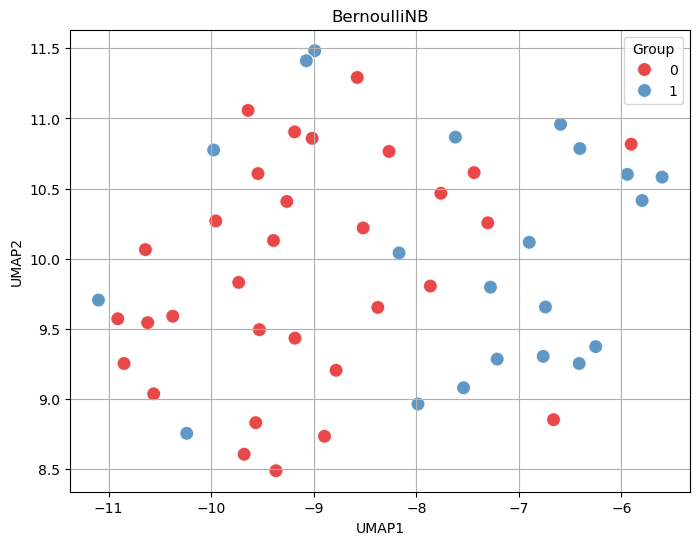

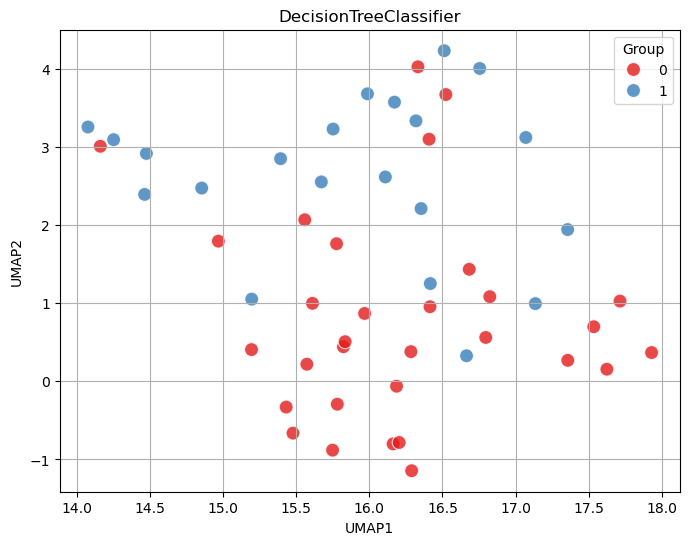

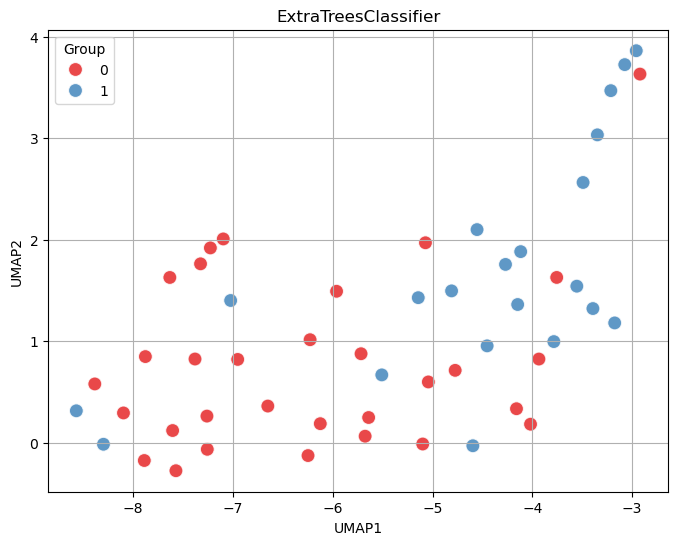

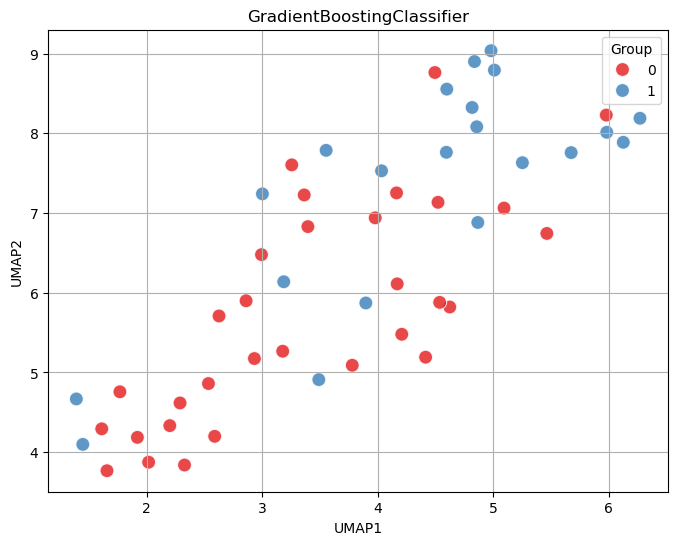

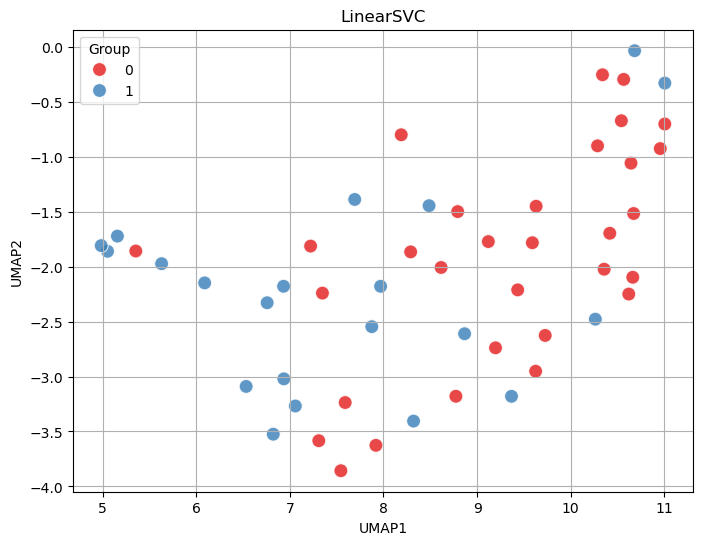

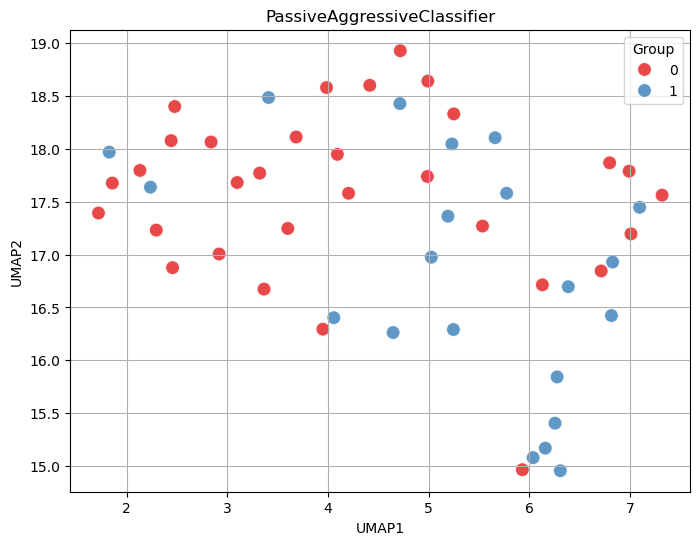

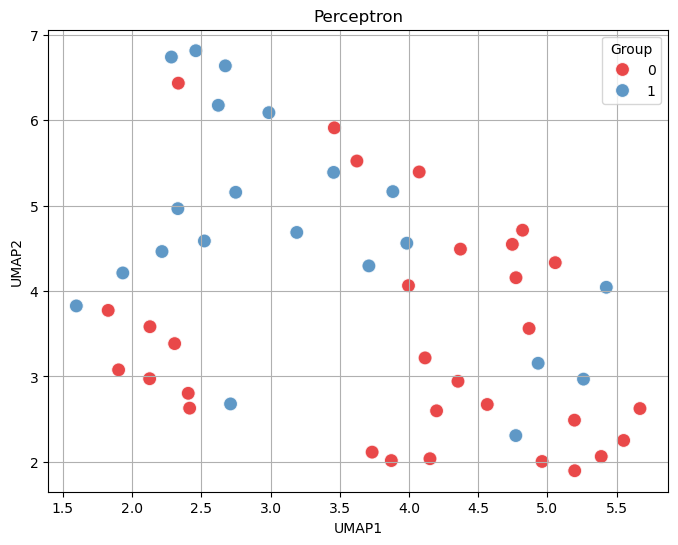

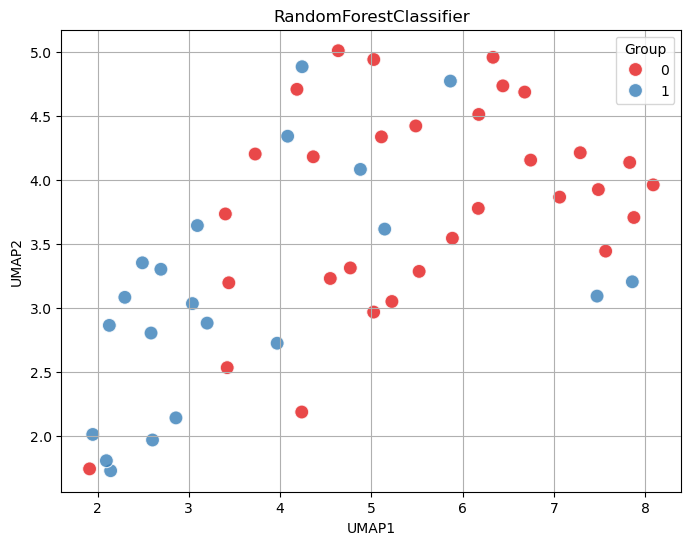

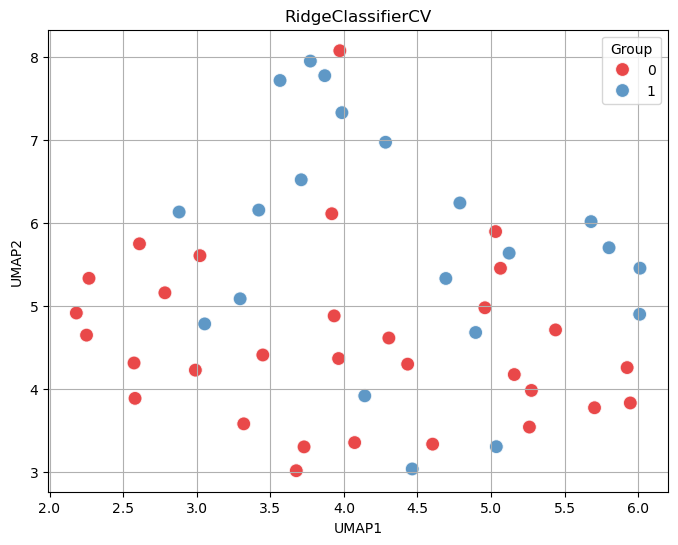

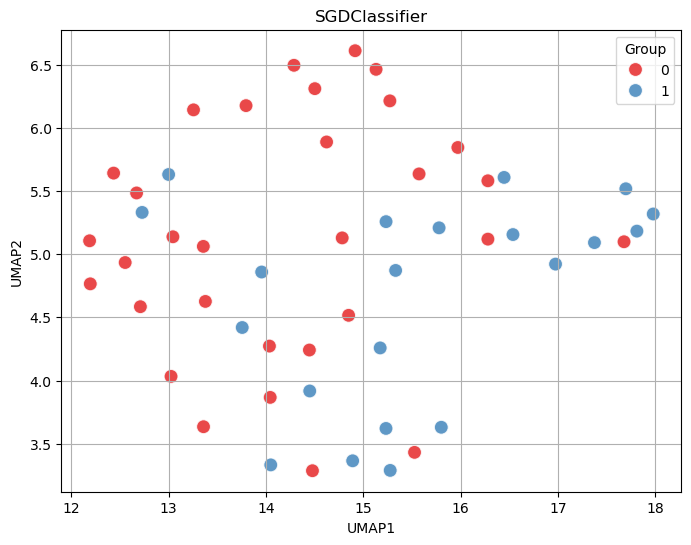

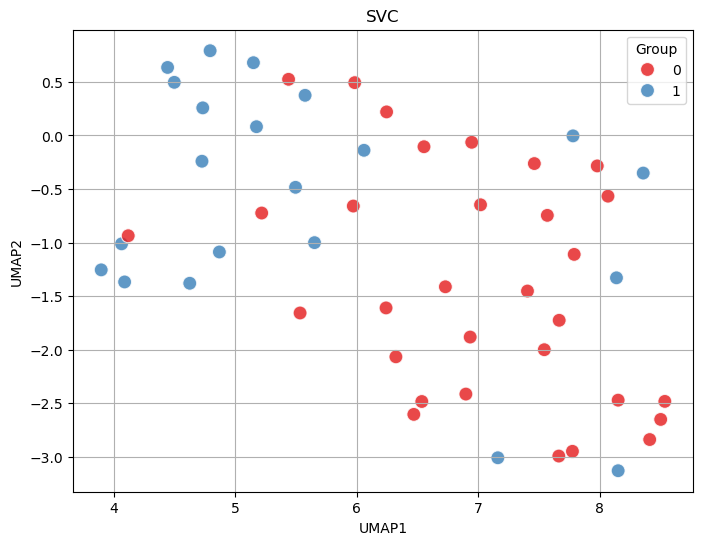

In [197]:
data = "归一化后的数据/归一化后的数据（十七支队）.xlsx"
data_test = "归一化后的数据/归一化后的数据（十七支队）.xlsx"
model_list = ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier','GradientBoostingClassifier', 'LinearSVC' ,'PassiveAggressiveClassifier','Perceptron', 'RandomForestClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC']
for model_name in model_list:
    dataset_test_3 = pd.DataFrame(pd.read_excel(data_test, sheet_name="浙一验证集")) #external_test_1
    x_test_3 = dataset_test_3[dataset_test_3.columns[1:]]
    y_test_3 = dataset_test_3[['Group']].values.ravel()
    feature_df = pd.read_excel(f'/Users/louhao/Desktop/Figure5定稿图/图d（Metric Learning尽量凸显）/{model_name}/平均绝对值图数据.xlsx')
    feature_list = feature_df.loc[:, 'Feature']
    feature_list = feature_list[0:6] #特征数量
    x_test_3 = x_test_3[feature_list]
    df_path = f'./浙一6特征降维/{model_name}-umap.xlsx'
    plot_path = f'./浙一6特征降维/{model_name}-umap.png'
    myumap(x_test_3, y_test_3, model_name = model_name, df_path = df_path, plot_path=plot_path)


/Users/louhao/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


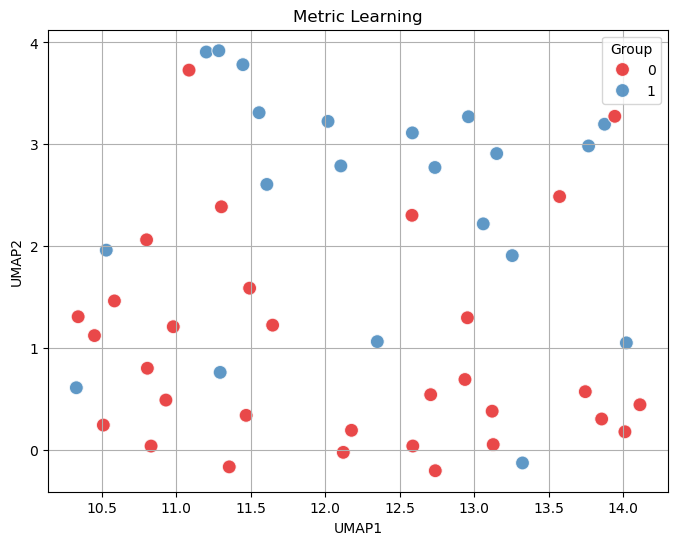

In [198]:
model_name = 'Metric Learning'
dataset_test_3 = pd.DataFrame(pd.read_excel(data_test, sheet_name="浙一验证集")) #external_test_1
x_test_3 = dataset_test_3[dataset_test_3.columns[1:]]
y_test_3 = dataset_test_3[['Group']].values.ravel()

feature_list = ['CRP', 'D-Dimer', 'LDH', 'Rash', 'SLNE', 'Age'] #metric learning

x_test_3 = x_test_3[feature_list]
df_path = f'./浙一6特征降维/{model_name}-umap.xlsx'
plot_path = f'./浙一6特征降维/{model_name}-umap.png'
myumap(x_test_3, y_test_3, model_name = model_name, df_path = df_path, plot_path=plot_path)

## kmeans

/Users/louhao/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


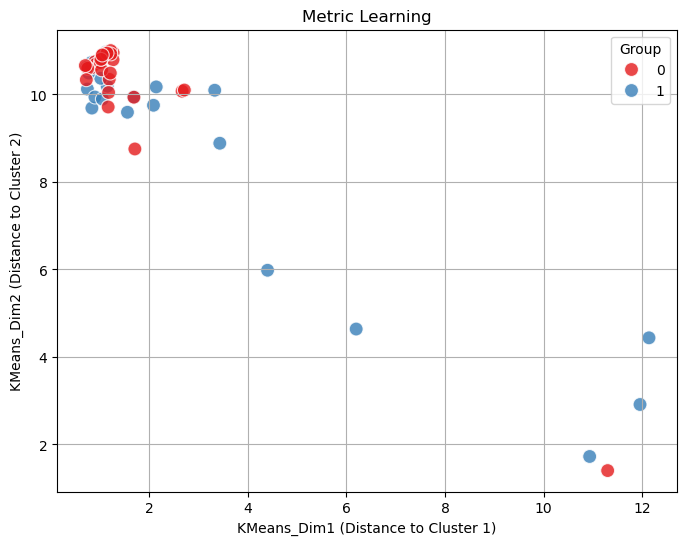

In [71]:
from sklearn.cluster import KMeans

# 假设 x 是输入特征数据，y 是标签

# 使用 KMeans 进行聚类 (分为 2 个簇)
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(x_test_3)

# 获取每个样本到每个簇中心的距离
distances = kmeans.transform(x_test_3)  # shape: (n_samples, n_clusters)

# 将距离作为降维后的两个新特征
reduced_df = pd.DataFrame(distances, columns=['KMeans_Dim1', 'KMeans_Dim2'])
reduced_df['Label'] = y_test_3
reduced_df.to_excel(f'./浙一5特征降维（十七）/{model_name}-kmeans.xlsx', index=False)

# 绘制降维后的散点图，用标签 y 作为颜色
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KMeans_Dim1', y='KMeans_Dim2', hue='Label', data=reduced_df, palette='Set1', s=100, alpha=0.8)
plt.title(f'{model_name}')
plt.xlabel("KMeans_Dim1 (Distance to Cluster 1)")
plt.ylabel("KMeans_Dim2 (Distance to Cluster 2)")
plt.legend(title='Group')
plt.grid(True)
plt.savefig(f'./浙一5特征降维（十七）/{model_name}-kmeans.png', dpi=300, bbox_inches='tight')
plt.show()


## 系数计算

In [217]:
results = []
model_list = ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier','GradientBoostingClassifier', 'LinearSVC' ,'PassiveAggressiveClassifier','Perceptron', 'RandomForestClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'Metric Learning']

### 欧氏距离、轮廓系数

In [231]:
from sklearn.metrics import pairwise_distances, silhouette_score
model_name = model_list[12]
df = pd.read_excel(f'./浙一6特征降维/{model_name}-umap.xlsx')
# 1. 欧氏距离计算
centroids = df.iloc[:, :3].groupby('Group')[['UMAP1', 'UMAP2']].mean() # 改
distance_matrix = pairwise_distances(centroids, metric='euclidean')
euclidean_distance = distance_matrix[0,1]
# 显示欧氏距离矩阵
print("欧氏距离（不同标签样本中心点之间的距离）：", distance_matrix[0,1])
# 2. 轮廓系数计算
sil_score = silhouette_score(df.iloc[:, :2], df.iloc[:, 2])
print("轮廓系数（Silhouette Score）：", sil_score)
results.append({
    'model_name': model_name,
    'euclidean_distance': euclidean_distance,
    'silhouette_score': sil_score
})

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results)
results_df

欧氏距离（不同标签样本中心点之间的距离）： 1.4756580836781084
轮廓系数（Silhouette Score）： 0.1666028203382776


,model_name,euclidean_distance,silhouette_score
0,AdaBoostClassifier,1.681969,0.165664
1,BernoulliNB,1.533021,0.186575
2,DecisionTreeClassifier,1.854295,0.223764
3,ExtraTreesClassifier,1.881567,0.205415
4,GradientBoostingClassifier,1.859112,0.167021
5,LinearSVC,1.715960,0.158331
6,PassiveAggressiveClassifier,1.295935,0.100081
7,Perceptron,1.469860,0.123939
8,RandomForestClassifier,2.017541,0.196352
9,RidgeClassifierCV,1.235552,0.111450


In [232]:
results_df.to_excel(f'./浙一6特征降维/umap-样本分离度.xlsx', index=False)

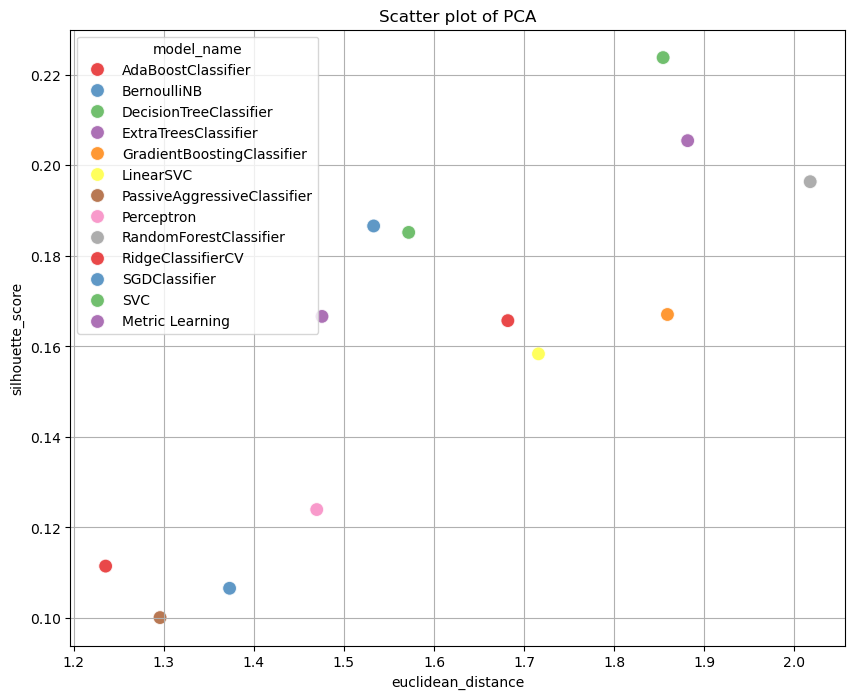

In [233]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='euclidean_distance', y='silhouette_score', hue='model_name', data=results_df, palette='Set1', s=100, alpha=0.8)

# 添加标题和标签
#plt.title(f'Scatter plot of PCA')
plt.xlabel('euclidean_distance')
plt.ylabel('silhouette_score')
plt.legend(title='model_name')
plt.grid(True)

# 显示图形
plt.savefig(f'./浙一6特征降维/umap_样本分离度.png', dpi=300, bbox_inches='tight')
plt.show()

### cohen_kappa（不合适？）

In [ ]:
from sklearn.metrics import cohen_kappa_score

# 这里的 y_true 是实际标签，y_pred 是预测标签
# 假设你有一个预测标签列（比如在你的数据集中）
y_pred = ...  # 预测标签，这里需要根据你的实际情况填入

kappa = cohen_kappa_score(y, y_pred)
print("Cohen's Kappa：", kappa)


In [417]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score

# 创建一个示例数据集
data = {
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'label': np.random.choice([0, 1], size=100)
}
df = pd.DataFrame(data)

# 设置特征和标签
X = df[['feature_1', 'feature_2']].values
y = df['label'].values

# 定义K值
K = 5

# 使用KNN预测标签
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X, y)
y_pred = knn.predict(X)

# 计算Cohen's Kappa分数
kappa_score = cohen_kappa_score(y, y_pred)
print("Cohen's Kappa 分数:", kappa_score)


Cohen's Kappa 分数: 0.28


### LDA

In [293]:
results = []
model_list = ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier','GradientBoostingClassifier', 'LinearSVC' ,'PassiveAggressiveClassifier','Perceptron', 'RandomForestClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'Metric Learning']

In [306]:
model_name = model_list[12]
df = pd.read_excel(f'./浙一5特征降维/{model_name}-umap.xlsx')
# 定义计算Fisher's Linear Discriminant (FLD) 的函数
def fisher_linear_discriminant(df):
    # 分割数据为两类
    class_0 = df[df['Group'] == 0][['UMAP1', 'UMAP2']]
    class_1 = df[df['Group'] == 1][['UMAP1', 'UMAP2']]
    
    # 计算每一类的均值
    mean_0 = class_0.mean().values
    mean_1 = class_1.mean().values

    # 计算类内散布矩阵
    scatter_0 = np.cov(class_0.values.T)
    scatter_1 = np.cov(class_1.values.T)
    scatter_within = scatter_0 + scatter_1

    # 计算类间散布矩阵
    mean_diff = (mean_1 - mean_0).reshape(-1, 1)
    scatter_between = mean_diff @ mean_diff.T

    # 计算Fisher's Linear Discriminant (FLD)
    # 需要求解广义特征值问题
    inv_scatter_within = np.linalg.inv(scatter_within)
    eig_vals, eig_vecs = np.linalg.eig(inv_scatter_within @ scatter_between)

    # 返回最大的特征值和对应的特征向量
    max_eig_index = np.argmax(eig_vals)
    return eig_vals[max_eig_index], eig_vecs[:, max_eig_index]

# 计算FLD
max_eigenvalue, fld_vector = fisher_linear_discriminant(df)

print("最大特征值:", max_eigenvalue)
print("对应的特征向量:", fld_vector)

results.append({
    'model_name': model_name,
    'FLD': max_eigenvalue
})

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results)
results_df

最大特征值: 0.6895817730775191
对应的特征向量: [0.87359091 0.48666099]


,model_name,FLD
0,AdaBoostClassifier,0.687881
1,BernoulliNB,0.707789
2,DecisionTreeClassifier,1.318873
3,ExtraTreesClassifier,0.567326
4,GradientBoostingClassifier,0.689480
5,LinearSVC,0.471160
6,PassiveAggressiveClassifier,0.354891
7,Perceptron,0.524532
8,RandomForestClassifier,0.617529
9,RidgeClassifierCV,0.533402


In [307]:
results_df.to_excel(f'./浙一5特征降维/样本分离度/umap-样本分离度LDA.xlsx', index=False)

### KNN

In [402]:
from sklearn.neighbors import NearestNeighbors
results = []
model_list = ['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'ExtraTreesClassifier','GradientBoostingClassifier', 'LinearSVC' ,'PassiveAggressiveClassifier','Perceptron', 'RandomForestClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'Metric Learning']

In [415]:
model_name = model_list[12]
df = pd.read_excel(f'./浙一5特征降维/{model_name}-pca.xlsx')

# 设置特征和标签
X = df[['PC1', 'PC2']]
y = df['Group'].values

# 定义K值
K = 5

# 计算KNN类别分离度
def knn_separation_score(X, y, K):
    nbrs = NearestNeighbors(n_neighbors=K + 1).fit(X)  # +1因为包含自己
    knn_indices = nbrs.kneighbors(X, return_distance=False)[:, 1:]  # 排除自己

    separation_scores = []
    for i, neighbors in enumerate(knn_indices):
        same_class_count = sum(y[neighbors] == y[i])
        separation_score = same_class_count / K  # 计算相同类别的比例
        separation_scores.append(separation_score)

    return np.mean(separation_scores)

# 计算类别分离度得分
separation_score = knn_separation_score(X, y, K)
print("KNN 类别分离度得分:", separation_score)

results.append({
    'model_name': model_name,
    'KNN': separation_score
})
results_df = pd.DataFrame(results)
results_df

KNN 类别分离度得分: 0.6653846153846152


,model_name,KNN
0,AdaBoostClassifier,0.607692
1,BernoulliNB,0.615385
2,DecisionTreeClassifier,0.630769
3,ExtraTreesClassifier,0.611538
4,GradientBoostingClassifier,0.638462
5,LinearSVC,0.603846
6,PassiveAggressiveClassifier,0.600000
7,Perceptron,0.607692
8,RandomForestClassifier,0.630769
9,RidgeClassifierCV,0.603846


In [416]:
results_df.to_excel(f'./浙一5特征降维/样本分离度/pca-样本分离度KNN.xlsx', index=False)

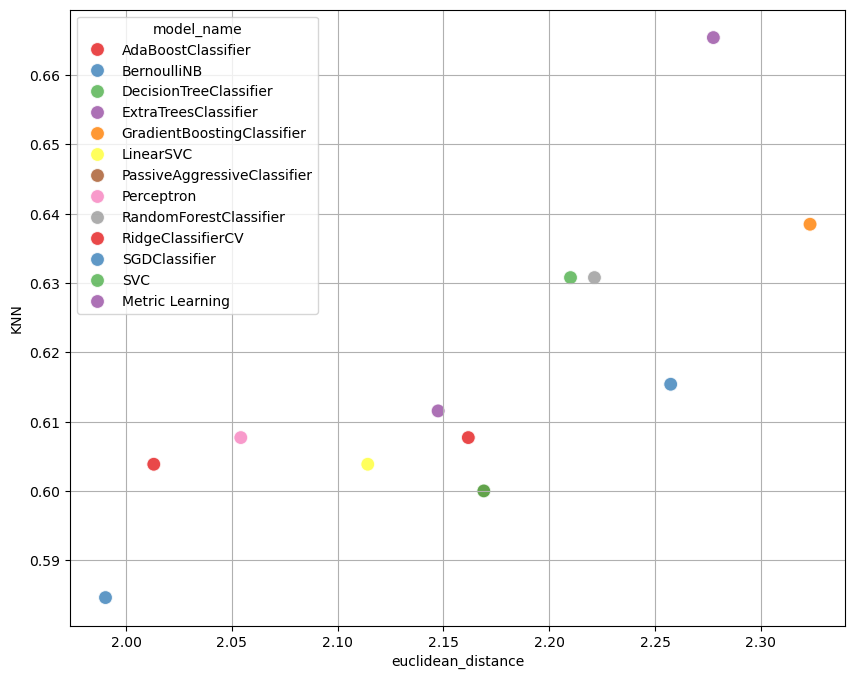

In [419]:
results_df  = pd.read_excel('./浙一5特征降维/样本分离度/pca-样本分离度.xlsx')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='euclidean_distance', y='KNN', hue='model_name', data=results_df, palette='Set1', s=100, alpha=0.8)

# 添加标题和标签
#plt.title(f'Scatter plot of PCA')
plt.xlabel('euclidean_distance')
plt.ylabel('KNN')
plt.legend(title='model_name')
plt.grid(True)

# 显示图形
plt.savefig(f'./浙一5特征降维/pca_样本分离度.png', dpi=300, bbox_inches='tight')
plt.show()